In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vehicles.csv', index_col='id')

In [3]:
df.head(10)

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN


In [4]:
print("Shape of dataset:")
display(df.shape)
display(df.info())

Shape of dataset:


(426880, 25)

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           426880 non-null  object 
 1   region        426880 non-null  object 
 2   region_url    426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          425675 non-null  float64
 5   manufacturer  409234 non-null  object 
 6   model         421603 non-null  object 
 7   condition     252776 non-null  object 
 8   cylinders     249202 non-null  object 
 9   fuel          423867 non-null  object 
 10  odometer      422480 non-null  float64
 11  title_status  418638 non-null  object 
 12  transmission  424324 non-null  object 
 13  VIN           265838 non-null  object 
 14  drive         296313 non-null  object 
 15  size          120519 non-null  object 
 16  type          334022 non-null  object 
 17  paint_color   296677 non-null  object 
 

None

In [5]:
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
df = df.drop_duplicates()

In [24]:
df.shape

(377706, 17)

In [7]:
df.nunique()

url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

,missing_count,missing_percentage
county,426880,100.00
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93


Text(0.5, 1.0, 'Features missing percentage')

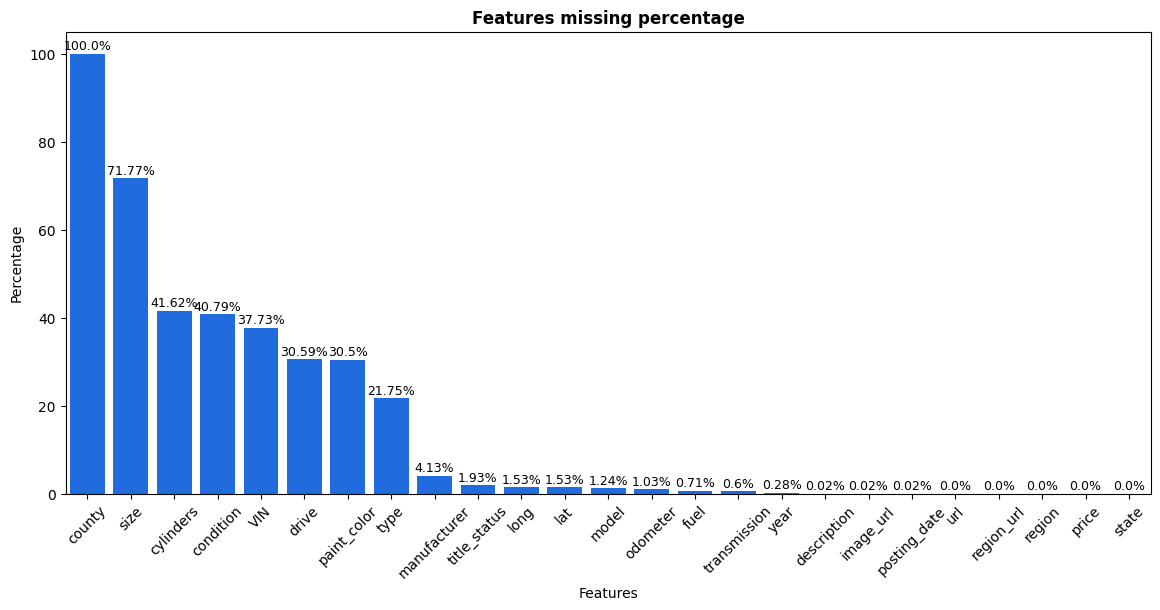

In [8]:
missing_vals = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['missing_count'])
missing_vals['missing_percentage'] = (missing_vals['missing_count']/df.shape[0])*100
missing_vals['missing_percentage'] = missing_vals['missing_percentage'].round(2)
display(missing_vals)

plt.figure(figsize=(14,6))
sns.barplot(data=missing_vals, x=missing_vals.index, y='missing_percentage', color="#0066FF")
plt.xticks(rotation=45)
for i, val in enumerate(missing_vals['missing_percentage']):
    plt.text(i, val + 0.2, f"{val}%", ha='center', va='bottom', fontsize=9)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Features missing percentage', fontweight='bold')

In [9]:
cols_to_remove = ['url', 'region_url', 'VIN', 'size', 'paint_color', 'image_url', 'description', 'county']
df = df.drop(columns=cols_to_remove)

In [10]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


C:\Users\mHomi\AppData\Local\Temp\ipykernel_3844\2091872050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15_regions, y='region', x='count', palette='viridis')


Text(0.5, 1.0, 'Top 15 regions by car advertises')

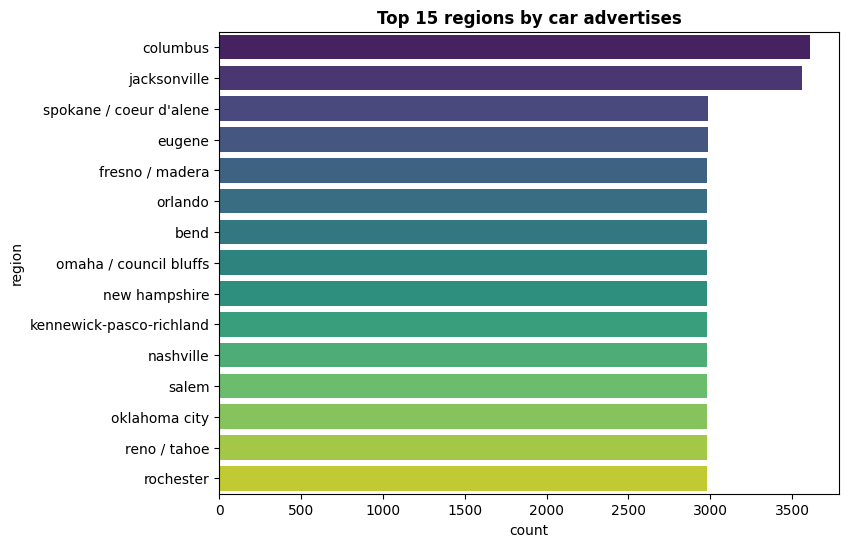

In [11]:
top15_regions = pd.DataFrame(df['region'].value_counts().sort_values(ascending=False)).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=top15_regions, y='region', x='count', palette='viridis')
plt.title('Top 15 regions by car advertises', fontweight='bold')

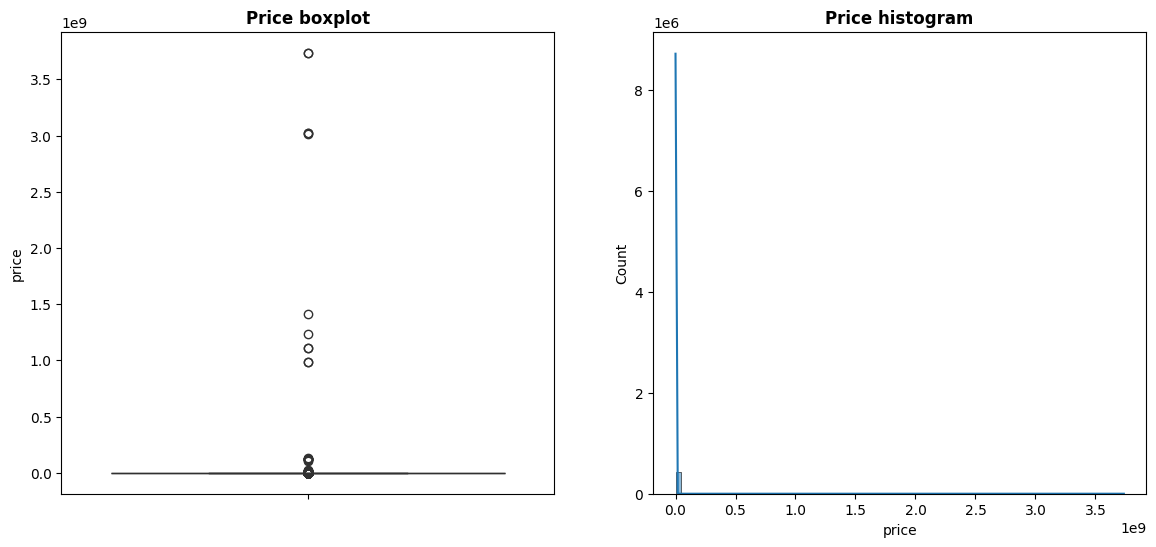

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(y=df['price'], ax=ax[0], color="#00A316")
ax[0].set_title('Price boxplot', fontweight='bold')

sns.histplot(data=df, x='price', bins=80, kde=True, ax=ax[1])
ax[1].set_title('Price histogram', fontweight='bold')

plt.show()

- We see some extreme outliers with few cars costing around $1 billion and one is even above $3.5 billions so we will remove those outliers

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  state         426880 non-null  object 
 14  lat           420331 non-null  float64
 15  long          420331 non-null  float64
 16  posting_date  426812 non-null  object 
dtypes: float64(4), int64(1), object(12)
memo

Text(0.5, 1.0, 'Odometer distribution')

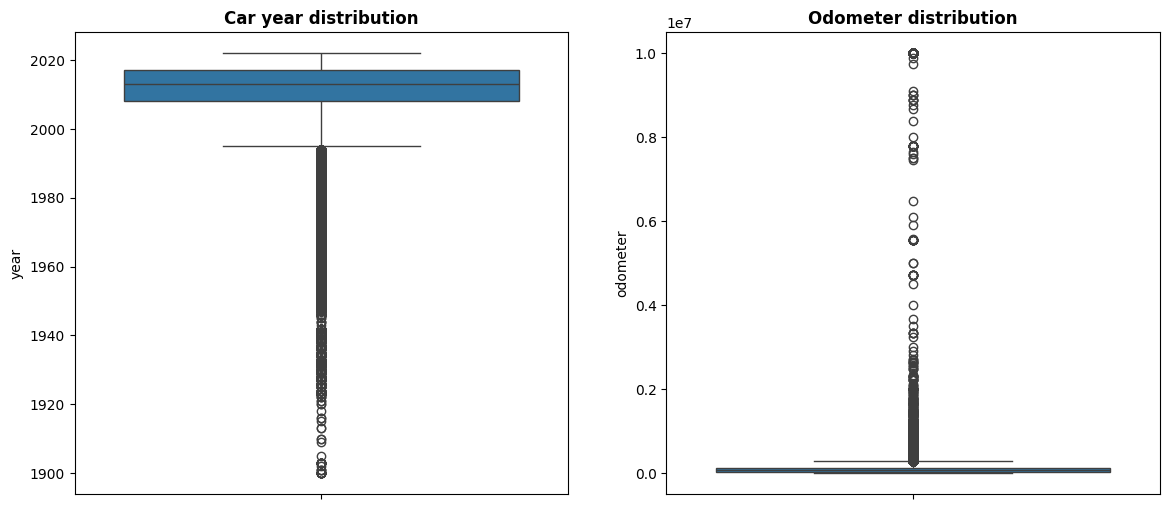

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(data=df, y='year', ax=ax[0],)
ax[0].set_title('Car year distribution', fontweight='bold')

sns.boxplot(data=df, y='odometer', ax=ax[1])
ax[1].set_title('Odometer distribution', fontweight='bold')


In [15]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


C:\Users\mHomi\AppData\Local\Temp\ipykernel_3844\3042459748.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_manufacturer, x='count', y='manufacturer', palette='viridis')


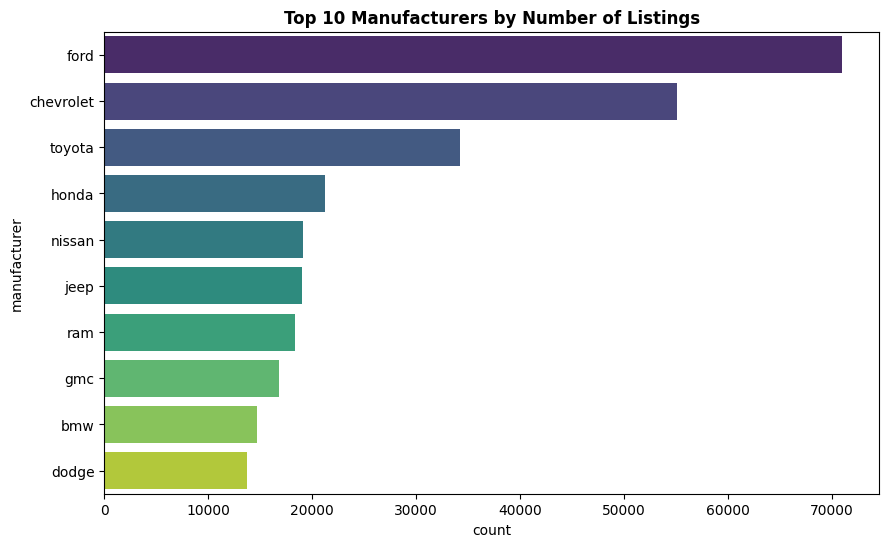

In [16]:
top10_manufacturer = pd.DataFrame(df['manufacturer'].value_counts().sort_values(ascending=False).head(10))
top10_manufacturer = top10_manufacturer.reset_index()
top10_manufacturer.columns = ['manufacturer', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=top10_manufacturer, x='count', y='manufacturer', palette='viridis')
plt.title('Top 10 Manufacturers by Number of Listings', fontweight='bold')
plt.show()

C:\Users\mHomi\AppData\Local\Temp\ipykernel_3844\2673145071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='condition', y='price', palette='tab10')


Text(0.5, 1.0, 'Price per cars condition')

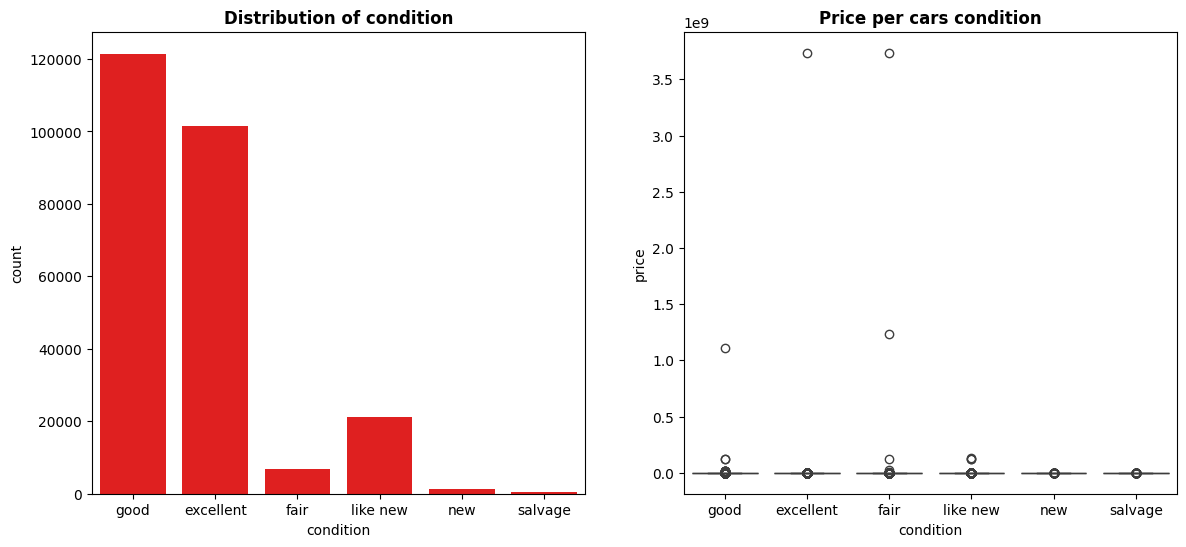

In [17]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

sns.countplot(data=df, x='condition', ax=ax[0], color='red')
ax[0].set_title('Distribution of condition', fontweight='bold')

sns.boxplot(data=df, x='condition', y='price', palette='tab10')
ax[1].set_title('Price per cars condition', fontweight='bold')


In [18]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [19]:
df = df[(df['price'] > 100) & (df['price'] < 150000)]

In [20]:
df = df[(df['year'] > 1980) & (df['odometer'] < 500000)]

In [21]:
df['cylinders'] = df['cylinders'].str.extract('(\d+)')
df['cylinders'] = df['cylinders'].astype('float')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mHomi\AppData\Local\Temp\ipykernel_3844\2369741736.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cylinders'] = df['cylinders'].str.extract('(\d+)')


C:\Users\mHomi\AppData\Local\Temp\ipykernel_3844\3621207934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cyliders_mean_price, x='cylinders', y='price', palette='magma')


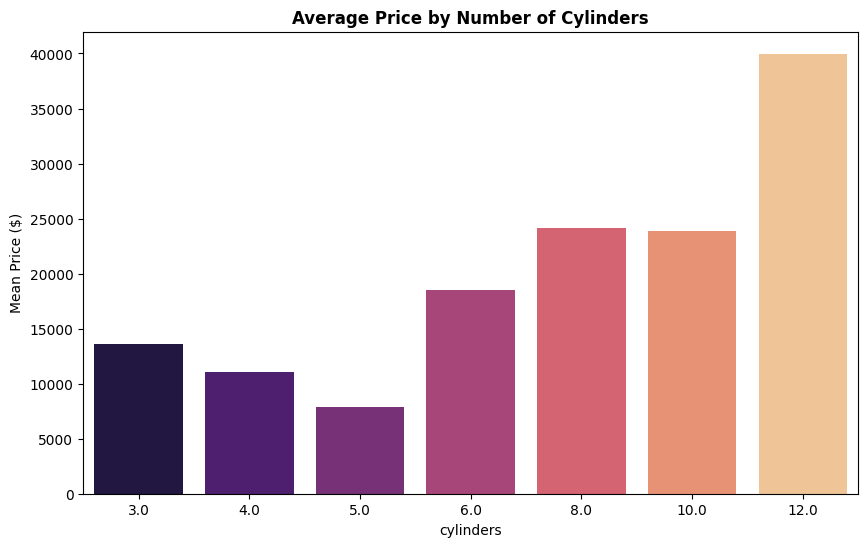

In [22]:
cyliders_mean_price = df.groupby('cylinders')['price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=cyliders_mean_price, x='cylinders', y='price', palette='magma')
plt.title('Average Price by Number of Cylinders', fontweight='bold')
plt.ylabel('Mean Price ($)')
plt.show()
